# PHY3009 assignment 4 - student number 40102112

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
import scipy.stats as stats
import scipy


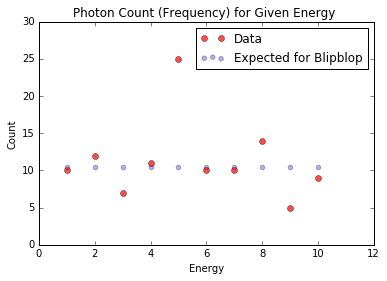

In [4]:
# here's the data: #count in each bin
data = np.array([10.,12.,7.,11.,25.,10.,10.,14.,5.,9.])
blip=np.ones(len(data))*10.5 #array for expected blip rate
#print(blip)
energies=np.array([1.,2.,3.,4.,5.,6.,7.,8.,9.,10.])
#expect to see 10.5 energies per bin
pylab.plot(energies,data,'ro',alpha=0.7,label='Data')
pylab.scatter(energies,blip,alpha=0.3,label='Expected for Blipblop')
plt.title('Photon Count (Frequency) for Given Energy ')
plt.xlabel('Energy')
plt.ylabel('Count')
pylab.legend(loc='upper right')

In [5]:
#poisson as discrete
from math import factorial
u=10.5 #expected
x=25 #observed

#photons are discrete countable so poisson distribution
prob1=(np.exp(-u)*((u**x)/(factorial(x)))) #eqution for poisson
print('probability of 25 photons in the fith bin \nif the true rate is 10.5 :%e'%prob1)


#for >=25, faster to work out P(sucess)=1-P(failure), failure values 0 to 24
count=0
for x in range (0,25):
    p2=(np.exp(-u)*((u**x)/(factorial(x))))#probaility for poisson distribution
    count=count+p2 #count is the cummulative probability of failure
    
prob2=(1-count)

print('probability of 25 or more photons in the fith bin \nif the true rate is 10.5: %e'%prob2)


#need a random poisson distribution with a mean of 10.5
print('\n MONTE CARLO\n')

n=int(1e06)
for i in range(0,n):
    print('\n MONTE CARLO\n')
    print('# of monte carlo iterations %.2e'%(n))
    monte1=(np.random.poisson(10.5,n))#simulated n values for expected model
    monte2=(np.random.poisson(10.5,n))
    #print(monte1)
    #print(len(monte1))

    test1= monte1==25
    #boolean test, create a true-false list corresponding to monte values that fufile the condition,
    
    monte1new=(monte1[test1])
    #create array of acceptable monte values by applying boolean array
    print('amount energies = 25:\t%i'%len(monte1new))
  
    probp1=len(monte1new)/len(monte1)
    #this is the percentage of the monte carlo simulations that fufil the applied test
    #the percentage that fifills for a large number of iterations is taken to be the probability
    #specifically requires iterations to approach infinity, but is a good approximation)
    
    print('Monte-Carlo simulation, probability of 25 photons in the fith bin \nif the true rate is 10.5 :%e'%float(probp1))

    confi1=abs(probp1-prob1)/prob1
    print('variation from data probability =25:\t %f'%confi1)
    
    test2= monte1>=25
    #print (test1)
    monte2new=(monte2[test2])
    print('\namount energies => 25:\t%i'%len(monte2new))
    probp2=len(monte2new)/len(monte2)
    print ('Monte-Carlo simulation, probability of >=25 photons in the fith bin \nif the true rate is 10.5 :%e'%float(probp2))

    confi2=abs(probp2-prob2)/prob2
    print('variation from data probaility >=25:\t %f'%confi2)
    if confi2 <0.05 and confi1<0.05:
        print('\nboth less than 5 percentage variation from data\n%.0e interations required'%n)
        print ('\naccept\n')
        break
    else:
        print('\nreject, want both variations to be less than 5%\n')
    n=n*10
    
print('amount of data in our sample:\t %i'%sum(data))
print('interations required:\t %i'%n)
print('ratio:\t%i'%(n/sum(data)))

probability of 25 photons in the fith bin 
if the true rate is 10.5 :6.011665e-05
probability of 25 or more photons in the fith bin 
if the true rate is 10.5: 9.933169e-05

 MONTE CARLO


 MONTE CARLO

# of monte carlo iterations 1.00e+06
amount energies = 25:	63
Monte-Carlo simulation, probability of 25 photons in the fith bin 
if the true rate is 10.5 :6.300000e-05
variation from data probability =25:	 0.047963

amount energies => 25:	101
Monte-Carlo simulation, probability of >=25 photons in the fith bin 
if the true rate is 10.5 :1.010000e-04
variation from data probaility >=25:	 0.016795

both less than 5 percentage variation from data
1e+06 interations required

accept

amount of data in our sample:	 113
interations required:	 1000000
ratio:	8849


In [6]:
#writting a function for reduced chi squared
#note when reffering to chi squared test in this investigation, it will be a reduced
def chi2 (odata,edata):
    chi=np.sum(((odata-edata)**2)/edata)/(len(edata)-1-0)
    return chi


In [7]:
#if we assume 5th bin is anomalous, we will comapre it to what ahppens if we omit it
dataomit=np.delete(data,[4])
print (dataomit)
energiesomit=np.delete(energies,[4])

[ 10.  12.   7.  11.  10.  10.  14.   5.   9.]


In [8]:
edata=np.ones(len(data))*10.5
print(edata)

chidata=chi2(data,edata)
print('Chi Squared fit for our data:\t%f'%chidata)
chidataomit=chi2(dataomit,edata[:9])
print('Chi Squared fit for our data with bin 5 omitted:\t%f'%chidataomit)

edatamonte=np.ones(len(data))*10.5
N2=int(1e05)
print(N2)
chimontechi=np.zeros(N2)#empty array to store our monte chi values
#do monte carlo simulation for chi squared, is ~2.8 reasonably close to 1?
for z in range (0,N2): #calculate individual chi for simulated data same length as our observed data N2 times
    montechi=(np.random.poisson(10.5,len(data)))
    chimontechi[z]=chi2(montechi,edatamonte) #store value
    chitest=chimontechi>=chidata #mask for how many give me a fit of that or worse
    chitest2=chimontechi>=chidataomit
    


[ 10.5  10.5  10.5  10.5  10.5  10.5  10.5  10.5  10.5  10.5]
Chi Squared fit for our data:	2.862434
Chi Squared fit for our data with bin 5 omitted:	0.717262
100000


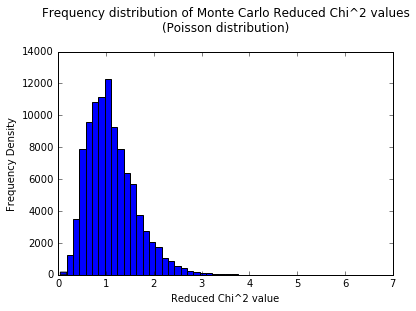

In [9]:

plt.hist(chimontechi,bins=50)
plt.title('Frequency distribution of Monte Carlo Reduced Chi^2 values\n(Poisson distribution)\n')
plt.xlabel('Reduced Chi^2 value')
plt.ylabel('Frequency Density')

In [10]:
print('mean of monte simulated chi values:\t%f'%np.mean(chimontechi))
#variance for poisson distribution is equal to the mean, therefore sigmna (std) is sqrt:
print('SD of monte simulated chi values:\t%f'%np.sqrt(np.mean(chimontechi)))
#chi values witih one standard deviation are therefore:
upper=np.mean(chimontechi)+np.sqrt(np.mean(chimontechi))
lower=np.mean(chimontechi)-np.sqrt(np.mean(chimontechi))
print('Upper limit value of 1SD from the mean of monte simulated chi values:\t%f'%upper)
print('Lower limit value of 1SD from the mean of monte simulated chi values:\t%f'%lower)

mean of monte simulated chi values:	1.113545
SD of monte simulated chi values:	1.055246
Upper limit value of 1SD from the mean of monte simulated chi values:	2.168791
Lower limit value of 1SD from the mean of monte simulated chi values:	0.058298


In [11]:
print('percentage of values generated with an equal/worse fit than the data:\t%f'%(sum(chitest)/len(chitest)))
print('percentage of values generated with an equal/worse fit than the omitted data set:\t%f'%(sum(chitest2)/len(chitest2)))
print('percentage of values generated with an equal/better fit than the omitted data set:\t%f'%(1-(sum(chitest2)/len(chitest2))))

percentage of values generated with an equal/worse fit than the data:	0.005840
percentage of values generated with an equal/worse fit than the omitted data set:	0.776020
percentage of values generated with an equal/better fit than the omitted data set:	0.223980


value u for maximum likelihood:	25


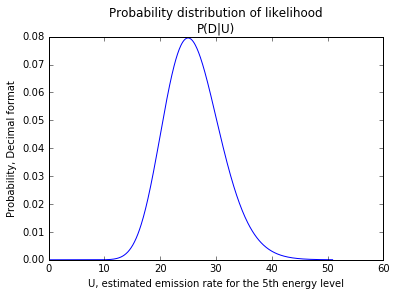

In [26]:
#Numerically showing the analytical solution to be true
#the probability distribution for the data given u
#ie P(D|u), the likelihood

pu=np.zeros(52)
u=np.arange(0,51,0.1) #knowing the analytical solution, sufficently large enough range of values
pu=(np.exp(-u)*((u**25)/(factorial(25)))) #again where 25 is the observed for poisson distribution
maxtestpu=pu==max(pu)#mask test to give maximum likelihood U
maxpu=(pu[maxtestpu])
maxu=(u[maxtestpu])
print('value u for maximum likelihood:\t%d'%maxu)
plt.plot(u,pu)
plt.title('Probability distribution of likelihood\nP(D|U)')
plt.ylabel('Probability, Decimal format')
plt.xlabel('U, estimated emission rate for the 5th energy level')

9.99999999988


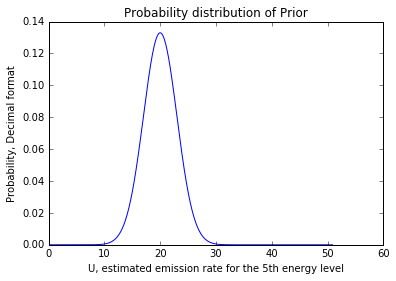

In [13]:
#Othe rresearch group prior
prior=np.zeros(52)
mean=20
std=3
u=np.arange(0,51,0.1)
#probability distribution for gaussian
prior=(1/(std*np.sqrt(2*np.pi)))*(np.exp(-((u-mean)**2)/(2*(std)**2)))
#print(sum(prior))
plt.plot(u,prior)
plt.title('Probability distribution of Prior')
plt.ylabel('Probability, Decimal format')
plt.xlabel('U, estimated emission rate for the 5th energy level')

In [15]:
#BAYESIAN ANALYSIS USING BAYES THEOREM
def posterior(u,observed,mean,std):
    likely=(np.exp(-u)*((u**observed)/(factorial(observed))))
    priory=(1/(std*np.sqrt(2*np.pi)))*(np.exp(-((u-mean)**2)/(2*(std)**2)))
    posty=likely*priory
    return posty

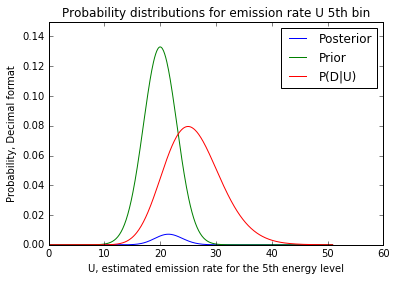

In [21]:
#post=pu*prior
u=np.arange(0,51,0.1)
post=posterior(u,25,20,3)
#print(post)
#print(max(post))
pylab.plot(u,post,'b-',label='Posterior')
pylab.plot(u,prior,'g-',label='Prior')
pylab.plot(u,pu,'r-',label='P(D|U)')
plt.ylim(0,0.15)
pylab.legend(loc='upper right')
plt.title('Probability distributions for emission rate U 5th bin')
plt.ylabel('Probability, Decimal format')
plt.xlabel('U, estimated emission rate for the 5th energy level')



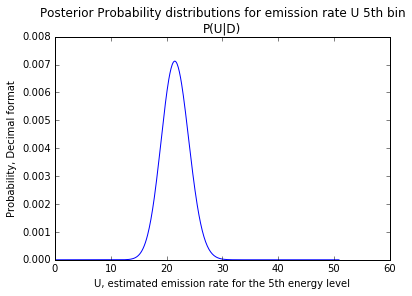

In [59]:

plt.plot(u,post,'b-')
plt.title('Posterior Probability distributions for emission rate U 5th bin\nP(U|D)')
plt.ylabel('Probability, Decimal format')
plt.xlabel('U, estimated emission rate for the 5th energy level')

In [61]:
maxtest=post==max(post)
maxpost=(post[maxtest])
maxpostu=(u[maxtest])
print(maxpost)
print('Maximum posterior estimate for emission rate u 5th energy bin:\t%f'%maxpostu[0])

[0.007120105996552079]
Maximum posterior estimate for emission rate u 5th energy bin:	21.500000


[  1.33506826   1.33506826   2.14763903 ...,  21.49823624  22.47613239
  21.62982279]
100000
100000
Mean value from metropolis, ie best estimate for u 5th bin:	21.449


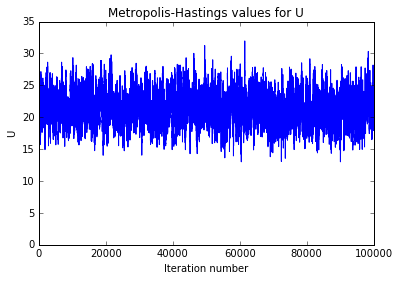

In [62]:
# a Metropolis-Hastings:
    
def metropolis(geuss0, iterations):
    # you should probably make an empty array to hold all the values we will add to the chain.
    chain=np.zeros(iterations)
    #print("I'm making some structure to hold my values")
    geussold=geuss0
    # then you need to make a loop over the desired number of iterations:
    for i in np.arange(0, iterations):
        
        #geuss from a gaussian of arbituary width around initial geuss
        geussnew=np.random.normal(geussold,0.5)
        #print(geussnew) #works
        
        
        #print("I'm calculating the probability ratio")
        postold=posterior(geussold,25,20,3)
        #print(postold)
        postnew=posterior(geussnew,25,20,3)
    
        ratio=postnew/postold
       
        
        # then you need to decide if you want to keep the old or the new one, 
        # using that random number thing we talked about in the lecture:
        random=np.random.random([1]) #from numpy random function between 0-1, array size 1.
        #print("I'm deciding which value to keep")
        if ratio>=random:
            geussold=geussnew
        else:
            geussold=geussold
        
        
        # whatever value you have chosen to keep needs to be added to the chain:
        #print("I'm adding the value to the chain")
        chain[i]=geussold
        
        
    # return the result:
    return(chain)

x=100000 #numver of iterations
mychain = metropolis(1.,x )


print(mychain)
print(len(mychain))
xaxis=np.arange(0,x)
print(len(xaxis))
    
print('Mean value from metropolis, ie best estimate for u 5th bin:\t%0.3f'%np.mean(mychain))
plt.plot(xaxis,mychain)
plt.title('Metropolis-Hastings values for U')
plt.ylabel('U')
plt.xlabel('Iteration number')



Estimated value u 5th bin from Metropolis:	21.448903
Estimated value u 5th bin from Posterior:	21.500000
percentage variation of metropolis from posterior mean:	0.24


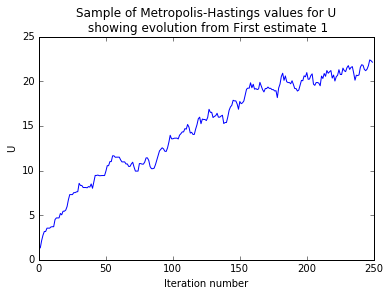

In [65]:
print('Estimated value u 5th bin from Metropolis:\t%f'%np.mean(mychain))
print('Estimated value u 5th bin from Posterior:\t%f'%maxpostu[0])
#percentage variation of metropolis from posterior mean
delta=abs(np.mean(mychain)-maxpostu[0])
percent=(delta/maxpostu[0])*100
print('percentage variation of metropolis from posterior mean:\t%0.2f'%percent)
plt.plot(xaxis[0:250],mychain[0:250])
plt.title('Sample of Metropolis-Hastings values for U\n showing evolution from First estimate 1')
plt.ylabel('U')
plt.xlabel('Iteration number')
#while trend always towards ~21.5, pertubations downwards are due to the random value ratio comaprison

(0, 8000)

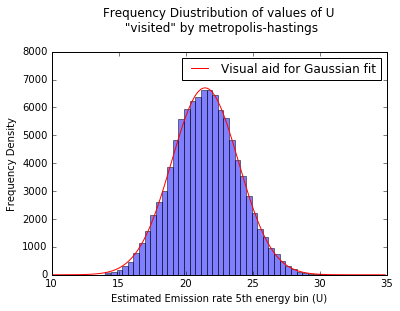

In [83]:
plt.hist(mychain,bins=50,range=(14,35),alpha=0.5)
x=np.arange(10,35,0.1)
#(1/(std*np.sqrt(2*np.pi)))*
y=(6700*np.exp(-((x-np.mean(mychain))**2)/(2*(np.std(mychain))**2)))
pylab.plot(x,y,'r',label='Visual aid for Gaussian fit')
plt.title ('Frequency Distribution of values of U\n "visited" by metropolis-hastings\n')#if larger data set of acceptr , better "fit"
plt.xlabel('Estimated Emission rate 5th energy bin (U)')
plt.ylabel('Frequency Density')
pylab.legend(loc='upper right')
plt.ylim(0,8000)


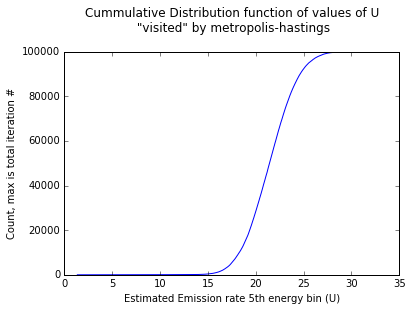

In [84]:
sort=np.sort(mychain)
plt.plot(sort,xaxis)
plt.title ('Cummulative Distribution function of values of U\n "visited" by metropolis-hastings\n')#if larger data set of acceptr , better "fit"
plt.xlabel('Estimated Emission rate 5th energy bin (U)')
plt.ylabel('Count, max is total iteration #')

In [91]:
#68% Confidence
print('Estimated value u 5th bin from Metropolis:\t%0.3f ± %0.3f  (to 3dcp)'%((np.mean(mychain)),(np.std(mychain))))


Estimated value u 5th bin from Metropolis:	21.449 ± 2.495  (to 3dcp)


In [97]:
#For ease of calculation true rate just assumed to be 21.5

#poisson as discrete
from math import factorial
u=21.5 #expected
x=25 #observed

#photons are discrete countable so poisson distribution
prob1=(np.exp(-u)*((u**x)/(factorial(x)))) #eqution for poisson
print('probability of 25 photons in the fith bin \nif the true rate is 21.5 :%f'%prob1)


#for >=25, faster to work out P(sucess)=1-P(failure), failure values 0 to 24
count=0
for x in range (0,25):
    p2=(np.exp(-u)*((u**x)/(factorial(x))))#probaility for poisson distribution
    count=count+p2 #count is the cummulative probability of failure
    
prob2=(1-count)

print('probability of 25 or more photons in the fith bin \nif the true rate is 21.5: %f'%prob2)


#need a random poisson distribution with a mean of 10.5
print('\n MONTE CARLO\n')

n=int(1e03)
for i in range(0,n):
    print('\n MONTE CARLO\n')
    print('# of monte carlo iterations %.2e'%(n))
    monte1=(np.random.poisson(u,n))#simulated n values for expected model
    monte2=(np.random.poisson(u,n))
    #print(monte1)
    #print(len(monte1))

    test1= monte1==25
    #boolean test, create a true-false list corresponding to monte values that fufile the condition,
    
    monte1new=(monte1[test1])
    #create array of acceptable monte values by applying boolean array
    print('amount energies = 25:\t%i'%len(monte1new))
  
    probp1=len(monte1new)/len(monte1)
    #this is the percentage of the monte carlo simulations that fufil the applied test
    #the percentage that fifills for a large number of iterations is taken to be the probability
    #specifically requires iterations to approach infinity, but is a good approximation)
    
    print('Monte-Carlo simulation, probability of 25 photons in the fith bin \nif the true rate is 21.5 :%f'%float(probp1))

    confi1=abs(probp1-prob1)/prob1
    print('variation from data probability =25:\t %f'%confi1)
    
    test2= monte1>=25
    #print (test1)
    monte2new=(monte2[test2])
    print('\namount energies => 25:\t%i'%len(monte2new))
    probp2=len(monte2new)/len(monte2)
    print ('Monte-Carlo simulation, probability of >=25 photons in the fith bin \nif the true rate is 21.5 :%f'%float(probp2))

    confi2=abs(probp2-prob2)/prob2
    print('variation from data probaility >=25:\t %f'%confi2)
    if confi2 <0.05 and confi1<0.05:
        print('\nboth less than 5 percentage variation from data\n%.0e interations required'%n)
        print ('\naccept\n')
        break
    else:
        print('\nreject, want both variations to be less than 5%\n')
    n=n*10
    
print('amount of data in our sample:\t %i'%sum(data))
print('interations required:\t %i'%n)
print('ratio:\t%i'%(n/sum(data)))














probability of 25 photons in the fith bin 
if the true rate is 21.5 :0.060671
probability of 25 or more photons in the fith bin 
if the true rate is 21.5: 0.252039

 MONTE CARLO


 MONTE CARLO

# of monte carlo iterations 1.00e+03
amount energies = 25:	63
Monte-Carlo simulation, probability of 25 photons in the fith bin 
if the true rate is 21.5 :0.063000
variation from data probability =25:	 0.038379

amount energies => 25:	268
Monte-Carlo simulation, probability of >=25 photons in the fith bin 
if the true rate is 21.5 :0.268000
variation from data probaility >=25:	 0.063325

reject, want both variations to be less than 5%


 MONTE CARLO

# of monte carlo iterations 1.00e+04
amount energies = 25:	605
Monte-Carlo simulation, probability of 25 photons in the fith bin 
if the true rate is 21.5 :0.060500
variation from data probability =25:	 0.002826

amount energies => 25:	2554
Monte-Carlo simulation, probability of >=25 photons in the fith bin 
if the true rate is 21.5 :0.255400
variat